In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import math

from torch.utils.data import Dataset, DataLoader
from torch import nn, from_numpy, optim
import torch.nn.functional as F
import time

In [146]:
import seaborn as sns

In [46]:
import matplotlib.pyplot as plt

In [2]:
otto_train = pd.read_csv('otto data/train.csv',index_col=0)
otto_test = pd.read_csv('otto data/test.csv', index_col=0)

In [28]:
otto_train = otto_train.sample(frac=1)

In [29]:
class OttoDataset(Dataset):
    """Otto Dataset"""
    def __init__(self,data):
        # data loading
        xy = data
        x = xy.iloc[:,:-1].values
        y = np.array([float(i[-1])-1 for i in xy.iloc[:,-1].values])
        
        self.x = from_numpy(x) # n_samples, n_classes
        self.y = from_numpy(np.reshape(y,[-1,1])) # n_samples, 1
        self.n_samples = xy.shape[0]
        
    def __getitem__(self,index):
        # dataset[0]
        return self.x[index], self.y[index]
        
    def __len__(self):
        # len(dataset)
        return self.n_samples

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Linear(93, 64)
        self.l2 = nn.Linear(64, 32)
        self.l3 = nn.Linear(32, 16)
        self.l4 = nn.Linear(16, 9)
    
    def forward(self, x):
        x = x.view(-1, 93) 
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        return self.l4(x)
    
model = Net()
#model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [40]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        #data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data.float())
        loss = criterion(output.float(), target.flatten().long())
        loss.backward()
        optimizer.step()
        if batch_idx % 1000 == 0:
            print('Train Epoch: {} | Batch Status: {}/{} ({:.0f}%) | Loss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
    return loss

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = data.to(device), target.to(device)
        output = model(data.float())
        # sum up batch loss
        test_loss += criterion(output.float(), target.flatten().long()).item()
        # get the index of the max
        pred = output.data.max(1, keepdim = True)[1]
        correct += pred.eq(target.data.view_as(pred).long()).cpu().sum()
        
    test_loss /= len(test_loader.dataset)
    print(f'==========================\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)}'
          f'({100. * correct / len(test_loader.dataset):.2f}%)')
    return correct, test_loss


In [59]:
model = Net()
#model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

otto_data = pd.read_csv('otto data/train.csv',index_col=0)
otto_data = otto_data.sample(frac=1)
separation = int(otto_data.shape[0] * 0.8)

train_d = otto_data[:separation]
test_d = otto_data[separation:]

train_dataset = OttoDataset(train_d)
test_dataset = OttoDataset(test_d)

#train_dataset = OttoDataset(ttype = 'train')
train_loader = DataLoader(dataset = train_dataset, batch_size = 10, shuffle = True)

#test_dataset = OttoDataset(ttype = 'test')
test_loader = DataLoader(dataset = test_dataset, batch_size = 10, shuffle = True)

In [85]:
for data, label in test_dataset:
    print(data)
    print(label)
    break

tensor([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2,
        3, 0, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
tensor([4.], dtype=torch.float64)


In [86]:
for i in train_loader:
    print(i)
    break

[tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  1,
          0,  0,  0,  0,  0,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  8,  0,  0,
          0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,
          0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  1,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0],
        [ 0,  0,  7,  3,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  7,  0,  3,
          0,  0,  1,  3,  0,  0,  0,  3,  6,  1,  0,  0,  0,  0,

In [60]:
if __name__ == '__main__':
    since = time.time()
    train_losses = []
    test_losses = []
    corrects = []
    c1 = test()
    test_losses.append(c1[1])
    corrects.append(c1[0].item())
    for epoch in range(1,30):
        epoch_start = time.time()
        trl = train(epoch)
        m, s = divmod(time.time() - epoch_start, 60)
        print(f'Training time: {m:.0f}m {s:.0f}s')
        c1 = test()
        m, s = divmod(time.time() - epoch_start, 60)
        print(f'Testing time: {m:.0f}m {s:.0f}s')
        
        train_losses.append(trl.item())
        test_losses.append(c1[1])
        corrects.append(c1[0].item())
    m, s = divmod(time.time() - since, 60)
    print(f'Total Time: {m:.0f}m {s:.0f}s\nModel was trained on cpu!')

Test set: Average loss: 0.2272, Accuracy: 982/12376(7.00%)
Train Epoch: 1 | Batch Status: 0/49502 (0%) | Loss: 2.268258
Train Epoch: 1 | Batch Status: 10000/49502 (20%) | Loss: 0.645478
Train Epoch: 1 | Batch Status: 20000/49502 (40%) | Loss: 0.653905
Train Epoch: 1 | Batch Status: 30000/49502 (61%) | Loss: 0.841517
Train Epoch: 1 | Batch Status: 40000/49502 (81%) | Loss: 0.388820
Training time: 0m 5s
Test set: Average loss: 0.0797, Accuracy: 8438/12376(68.00%)
Testing time: 0m 6s
Train Epoch: 2 | Batch Status: 0/49502 (0%) | Loss: 0.432636
Train Epoch: 2 | Batch Status: 10000/49502 (20%) | Loss: 1.069389
Train Epoch: 2 | Batch Status: 20000/49502 (40%) | Loss: 0.316272
Train Epoch: 2 | Batch Status: 30000/49502 (61%) | Loss: 1.032406
Train Epoch: 2 | Batch Status: 40000/49502 (81%) | Loss: 0.375801
Training time: 0m 5s
Test set: Average loss: 0.0619, Accuracy: 9355/12376(75.00%)
Testing time: 0m 6s
Train Epoch: 3 | Batch Status: 0/49502 (0%) | Loss: 0.613186
Train Epoch: 3 | Batch Sta

Test set: Average loss: 0.0565, Accuracy: 9688/12376(78.00%)
Testing time: 0m 6s
Train Epoch: 19 | Batch Status: 0/49502 (0%) | Loss: 0.381351
Train Epoch: 19 | Batch Status: 10000/49502 (20%) | Loss: 0.656350
Train Epoch: 19 | Batch Status: 20000/49502 (40%) | Loss: 0.692219
Train Epoch: 19 | Batch Status: 30000/49502 (61%) | Loss: 0.872252
Train Epoch: 19 | Batch Status: 40000/49502 (81%) | Loss: 1.057714
Training time: 0m 5s
Test set: Average loss: 0.0570, Accuracy: 9747/12376(78.00%)
Testing time: 0m 6s
Train Epoch: 20 | Batch Status: 0/49502 (0%) | Loss: 0.735908
Train Epoch: 20 | Batch Status: 10000/49502 (20%) | Loss: 0.322452
Train Epoch: 20 | Batch Status: 20000/49502 (40%) | Loss: 0.483388
Train Epoch: 20 | Batch Status: 30000/49502 (61%) | Loss: 1.728566
Train Epoch: 20 | Batch Status: 40000/49502 (81%) | Loss: 0.158357
Training time: 0m 5s
Test set: Average loss: 0.0557, Accuracy: 9712/12376(78.00%)
Testing time: 0m 6s
Train Epoch: 21 | Batch Status: 0/49502 (0%) | Loss: 0.

In [61]:
len(train_losses)

29

In [62]:
len(test_losses)

30

In [64]:
correct2 = []
for i in corrects:
    correct2.append(i/12376)

In [65]:
len(correct2)

30

In [71]:
plt.rcParams['figure.figsize'] = [10, 8]

In [150]:
test_loss_data = [a for a in range(30),b for b in test_losses]

SyntaxError: invalid syntax (<ipython-input-150-554f57ad14e1>, line 1)

In [152]:
list(zip(range(30), test_losses))

[(0, 0.22717835977143755),
 (1, 0.07967079050222481),
 (2, 0.06189704918993111),
 (3, 0.05997458089648131),
 (4, 0.05885384719500965),
 (5, 0.05727762568882909),
 (6, 0.05646148626858148),
 (7, 0.05706528804605705),
 (8, 0.057165135376175846),
 (9, 0.05524546857176767),
 (10, 0.056804480335678795),
 (11, 0.05621454221167576),
 (12, 0.06846120873762328),
 (13, 0.05550022954887301),
 (14, 0.05572684499191008),
 (15, 0.056621935687545005),
 (16, 0.05496091855694098),
 (17, 0.05520820716903476),
 (18, 0.056520929314140725),
 (19, 0.05702586107730502),
 (20, 0.05574903911708146),
 (21, 0.05565841594578803),
 (22, 0.05653529690606273),
 (23, 0.057793756533635665),
 (24, 0.057631781871264116),
 (25, 0.05637614466593093),
 (26, 0.057308704910153295),
 (27, 0.0568359326632933),
 (28, 0.055851942886379874),
 (29, 0.05684492503731278)]

In [153]:
ax = sns.lineplot(x="epoch", y="loss", data=list(zip(range(30), test_losses)))

AttributeError: 'list' object has no attribute 'get'

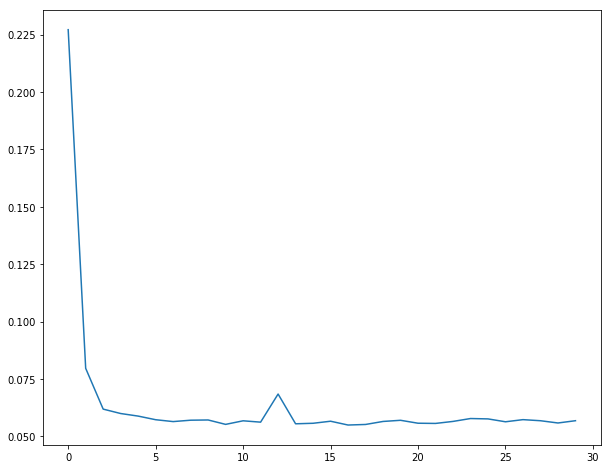

In [144]:
ax = plt.figure()
#plt.plot(list(range(1,30)),train_losses)
plt.plot(list(range(30)),test_losses)

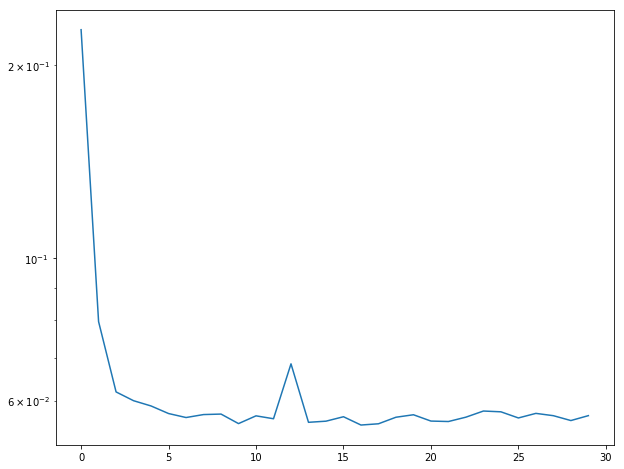

In [77]:
## TRY TO USE SEABORN TO CHECK THIS

ax = plt.figure()
#plt.plot(list(range(1,30)),train_losses)
plt.plot(list(range(30)),test_losses)
plt.yscale('log')

In [ ]:
plt.figure()
#plt.plot(list(range(1,30)),train_losses)
plt.plot(list(range(30)),test_losses)

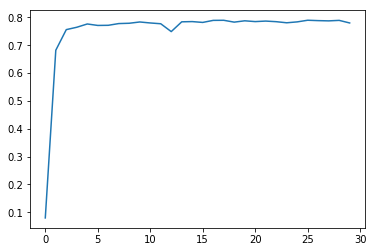

In [68]:
plt.figure()
plt.plot(range(30),correct2)

In [24]:
test_d

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
49503,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,4,2,2,0,Class_8
49504,7,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Class_8
49505,1,2,0,0,0,0,4,2,0,1,...,0,0,1,0,1,3,2,0,0,Class_8
49506,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Class_8
49507,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,8,2,0,0,Class_8
49508,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,Class_8
49509,0,0,2,0,0,0,1,0,0,2,...,0,0,1,0,0,1,0,0,0,Class_8
49510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Class_8
49511,2,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,2,0,0,0,Class_8


In [33]:
test_d

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
49503,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,4,2,2,0,Class_8
49504,7,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Class_8
49505,1,2,0,0,0,0,4,2,0,1,...,0,0,1,0,1,3,2,0,0,Class_8
49506,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Class_8
49507,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,8,2,0,0,Class_8
49508,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,Class_8
49509,0,0,2,0,0,0,1,0,0,2,...,0,0,1,0,0,1,0,0,0,Class_8
49510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Class_8
49511,2,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,2,0,0,0,Class_8


In [108]:
pred_labels = []
actual_labels = []
for data, label in test_dataset:
    tmp = model(data.float())
    tmp = tmp.data.max(1, keepdim = True)[1]
    pred_labels.append(tmp.item())
    actual_labels.append(int(label.item()))
    

In [103]:
len(pred_labels)

12376

In [89]:
len(actual_labels)

12376

In [101]:
pred_labels

[4,
 1,
 8,
 1,
 3,
 5,
 0,
 1,
 6,
 1,
 6,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 5,
 1,
 6,
 5,
 1,
 1,
 1,
 5,
 3,
 5,
 7,
 5,
 1,
 1,
 5,
 5,
 2,
 2,
 1,
 2,
 2,
 2,
 5,
 1,
 5,
 7,
 5,
 5,
 2,
 1,
 7,
 1,
 1,
 7,
 7,
 5,
 5,
 1,
 4,
 2,
 2,
 1,
 5,
 2,
 8,
 5,
 2,
 8,
 5,
 7,
 1,
 7,
 2,
 1,
 0,
 2,
 7,
 4,
 8,
 8,
 7,
 5,
 5,
 2,
 7,
 5,
 1,
 2,
 1,
 5,
 5,
 2,
 5,
 1,
 1,
 1,
 1,
 7,
 5,
 0,
 1,
 5,
 2,
 4,
 0,
 2,
 4,
 5,
 1,
 7,
 1,
 5,
 5,
 3,
 4,
 5,
 8,
 5,
 2,
 5,
 2,
 1,
 2,
 4,
 2,
 5,
 6,
 7,
 1,
 1,
 1,
 2,
 5,
 5,
 7,
 5,
 5,
 1,
 1,
 1,
 7,
 1,
 2,
 5,
 5,
 1,
 2,
 2,
 1,
 1,
 2,
 7,
 5,
 6,
 4,
 7,
 2,
 7,
 5,
 3,
 5,
 2,
 5,
 5,
 6,
 1,
 2,
 5,
 5,
 5,
 5,
 1,
 2,
 2,
 0,
 7,
 1,
 5,
 8,
 5,
 5,
 2,
 5,
 1,
 1,
 7,
 1,
 8,
 2,
 8,
 1,
 5,
 7,
 2,
 6,
 7,
 1,
 5,
 5,
 1,
 2,
 7,
 6,
 4,
 1,
 7,
 2,
 5,
 5,
 5,
 5,
 8,
 5,
 1,
 1,
 1,
 1,
 5,
 5,
 1,
 1,
 5,
 1,
 2,
 2,
 2,
 7,
 0,
 5,
 4,
 1,
 2,
 7,
 1,
 1,
 1,
 2,
 1,
 7,
 6,
 3,
 1,
 2,
 7,
 5,
 2,
 5,
 1,
 7,
 1,
 1,
 2,


In [109]:
actual_labels

[4,
 1,
 8,
 1,
 3,
 5,
 8,
 1,
 0,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 5,
 1,
 6,
 5,
 1,
 1,
 1,
 5,
 3,
 5,
 7,
 5,
 1,
 1,
 5,
 5,
 2,
 2,
 1,
 1,
 1,
 2,
 5,
 1,
 5,
 7,
 5,
 1,
 2,
 2,
 7,
 2,
 2,
 6,
 7,
 5,
 5,
 1,
 4,
 1,
 1,
 1,
 5,
 2,
 8,
 5,
 6,
 8,
 5,
 7,
 1,
 7,
 2,
 1,
 5,
 1,
 7,
 4,
 8,
 0,
 7,
 2,
 5,
 1,
 7,
 5,
 2,
 2,
 1,
 5,
 5,
 2,
 5,
 1,
 2,
 2,
 1,
 7,
 5,
 0,
 1,
 5,
 2,
 4,
 0,
 1,
 4,
 5,
 1,
 7,
 1,
 5,
 0,
 3,
 4,
 5,
 8,
 5,
 2,
 5,
 1,
 1,
 2,
 4,
 1,
 5,
 6,
 7,
 1,
 2,
 1,
 2,
 6,
 5,
 5,
 5,
 1,
 1,
 1,
 1,
 7,
 1,
 2,
 5,
 8,
 2,
 2,
 2,
 2,
 2,
 2,
 7,
 5,
 6,
 4,
 7,
 1,
 7,
 5,
 2,
 5,
 3,
 5,
 5,
 6,
 1,
 2,
 5,
 5,
 5,
 0,
 1,
 2,
 5,
 0,
 7,
 1,
 5,
 8,
 5,
 0,
 6,
 0,
 1,
 1,
 7,
 1,
 8,
 2,
 7,
 1,
 5,
 7,
 2,
 6,
 7,
 1,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 1,
 7,
 2,
 5,
 5,
 5,
 5,
 8,
 5,
 2,
 1,
 1,
 1,
 5,
 5,
 2,
 1,
 5,
 2,
 2,
 2,
 6,
 7,
 8,
 5,
 4,
 2,
 1,
 7,
 2,
 1,
 1,
 1,
 2,
 7,
 6,
 3,
 1,
 2,
 7,
 5,
 1,
 5,
 1,
 7,
 1,
 1,
 2,


In [111]:
cmt

,0,1,2,3,4,5,6,7,8


In [139]:
cmt = np.zeros((9,9),dtype=int)
for p in range(12376):
    cmt[actual_labels[p],pred_labels[p]] +=  1

In [140]:
cmt

array([[ 167,    3,    7,    0,    1,   26,   14,   73,   75],
       [   0, 2294,  826,   69,   10,   34,   29,    4,    8],
       [   0,  506, 1061,   41,    0,    9,   25,    4,    3],
       [   0,  116,  142,  257,    1,   14,    8,    1,    2],
       [   0,   10,    1,    0,  508,    0,    1,    0,    3],
       [  12,   10,    3,    8,    0, 2600,   47,   59,   26],
       [  15,   47,   63,    8,    2,   30,  367,   29,    5],
       [  18,   14,    5,    0,    1,   43,   17, 1549,   41],
       [  42,   12,    2,    2,    0,   53,    6,   39,  848]])

In [121]:
import itertools

In [117]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[4.56284153e-01 8.19672131e-03 1.91256831e-02 0.00000000e+00
  2.73224044e-03 7.10382514e-02 3.82513661e-02 1.99453552e-01
  2.04918033e-01]
 [0.00000000e+00 7.00671961e-01 2.52290776e-01 2.10751374e-02
  3.05436775e-03 1.03848503e-02 8.85766646e-03 1.22174710e-03
  2.44349420e-03]
 [0.00000000e+00 3.06852638e-01 6.43420255e-01 2.48635537e-02
  0.00000000e+00 5.45785324e-03 1.51607035e-02 2.42571255e-03
  1.81928441e-03]
 [0.00000000e+00 2.14417745e-01 2.62476895e-01 4.75046211e-01
  1.84842884e-03 2.58780037e-02 1.47874307e-02 1.84842884e-03
  3.69685767e-03]
 [0.00000000e+00 1.91204589e-02 1.91204589e-03 0.00000000e+00
  9.71319312e-01 0.00000000e+00 1.91204589e-03 0.00000000e+00
  5.73613767e-03]
 [4.33996383e-03 3.61663653e-03 1.08499096e-03 2.89330922e-03
  0.00000000e+00 9.40325497e-01 1.69981917e-02 2.13381555e-02
  9.40325497e-03]
 [2.65017668e-02 8.30388693e-02 1.11307420e-01 1.41342756e-02
  3.53356890e-03 5.30035336e-02 6.48409894e-01 5.12367491e

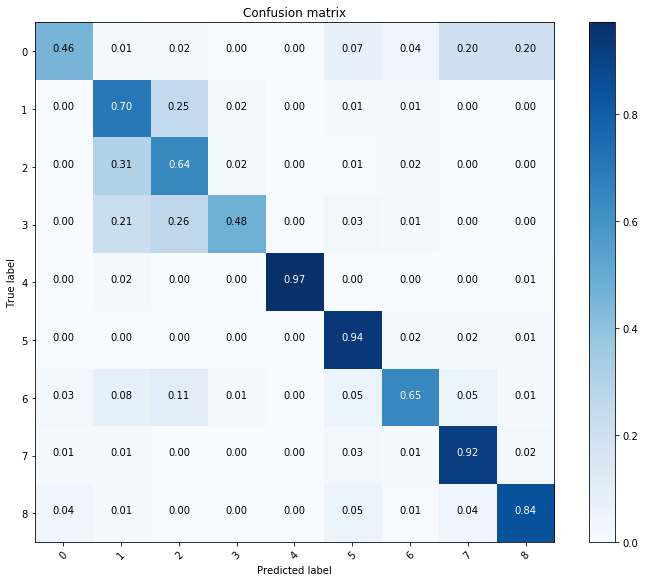

In [143]:
plot = plot_confusion_matrix(cmt, range(9),normalize=True)
#plt.savefig('confusion_matrix.png')
plt.savefig('confusion_matrix_ratio.png')

Confusion matrix, without normalization
[[ 167    3    7    0    1   26   14   73   75]
 [   0 2294  826   69   10   34   29    4    8]
 [   0  506 1061   41    0    9   25    4    3]
 [   0  116  142  257    1   14    8    1    2]
 [   0   10    1    0  508    0    1    0    3]
 [  12   10    3    8    0 2600   47   59   26]
 [  15   47   63    8    2   30  367   29    5]
 [  18   14    5    0    1   43   17 1549   41]
 [  42   12    2    2    0   53    6   39  848]]


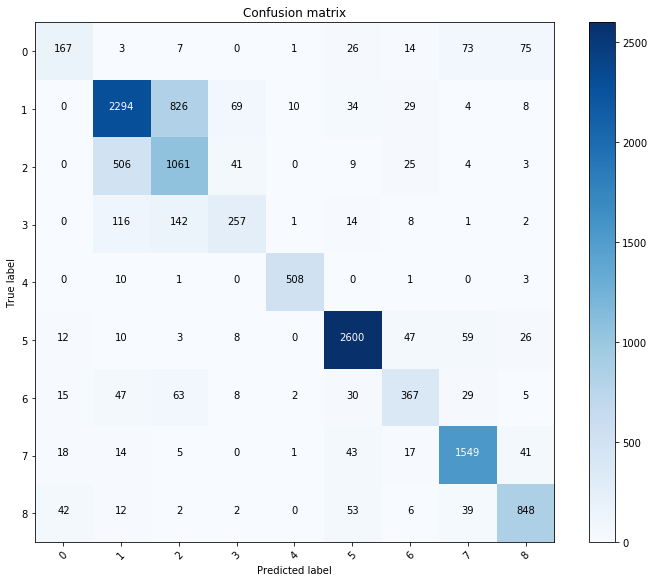

In [142]:
plot = plot_confusion_matrix(cmt, range(9))
plt.savefig('confusion_matrix.png')

In [129]:
true_class = []
for i in range(9):
    true_class.append(cmt[i,i])

In [130]:
true_class

[167, 2294, 1061, 257, 508, 2600, 367, 1549, 848]

In [131]:
total_class = [366, 3274, 1649, 541, 523, 2765, 566, 1688, 1004]

In [132]:
percentage = [true_class[i]/total_class[i] for i in range(9)]

In [133]:
percentage

[0.4562841530054645,
 0.7006719609040929,
 0.6434202546998181,
 0.47504621072088726,
 0.97131931166348,
 0.9403254972875226,
 0.6484098939929329,
 0.917654028436019,
 0.8446215139442231]

In [156]:
test_d.target.value_counts()

Class_2    3274
Class_6    2765
Class_8    1688
Class_3    1649
Class_9    1004
Class_7     566
Class_4     541
Class_5     523
Class_1     366
Name: target, dtype: int64

In [134]:
cmt.sum(axis=0)

array([ 366, 3274, 1649,  541,  523, 2765,  566, 1688, 1004])

In [135]:
cmt.sum(axis=1)

array([ 254, 3012, 2110,  385,  523, 2809,  514, 1758, 1011])

In [137]:
np.array(true_class)/cmt.sum(axis=0)

array([0.45628415, 0.70067196, 0.64342025, 0.47504621, 0.97131931,
       0.9403255 , 0.64840989, 0.91765403, 0.84462151])

In [138]:
np.array(true_class)/cmt.sum(axis=1)

array([0.65748031, 0.76162019, 0.5028436 , 0.66753247, 0.97131931,
       0.9255963 , 0.71400778, 0.8811149 , 0.83877349])

In [167]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

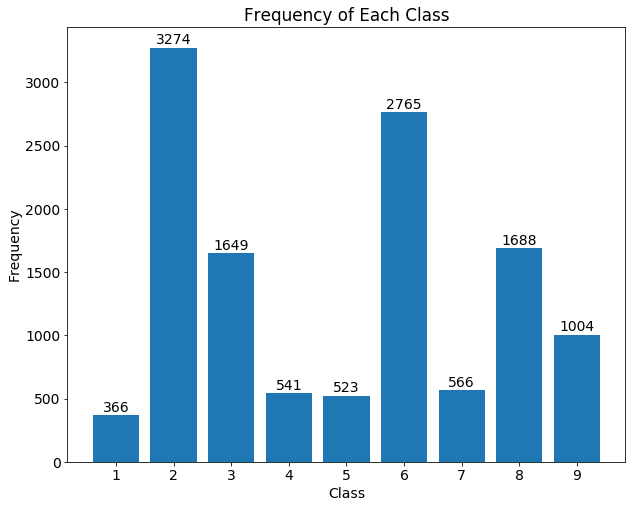

In [191]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots()
plt.bar(range(1,10),total_class)
ax.set_title('Frequency of Each Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')
ax.set_xticks(range(1,10))
#ax.set_xticklabels(range(1,10))

rects = ax.patches
for rect, label in zip(rects, total_class):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
plt.savefig('class_freq.png')

In [192]:
test_d.tail()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
52641,2,0,3,0,0,0,2,0,5,2,...,0,1,1,0,32,0,0,1,1,Class_8
60842,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,Class_9
44624,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Class_6
35447,2,0,1,0,0,0,0,0,1,2,...,2,3,24,0,0,0,0,0,37,Class_6
12958,0,0,0,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,Class_2


In [211]:
test_d['feat_56'].value_counts().sort_index().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            38, 39, 43, 49, 52, 57],
           dtype='int64')

In [210]:
test_d['feat_56'].value_counts()

0     10984
1       943
2       236
3        45
4        29
5        14
15       10
9        10
8         9
7         9
12        8
16        7
11        7
18        6
13        6
19        5
30        5
6         4
22        4
17        4
10        3
33        3
27        3
25        2
28        2
24        2
52        2
26        2
29        1
23        1
38        1
32        1
14        1
31        1
21        1
49        1
57        1
20        1
43        1
39        1
Name: feat_56, dtype: int64

In [199]:
one_feat = test_d['feat_56'].value_counts()

In [219]:
import matplotlib 
matplotlib.rc('xtick', labelsize=12)

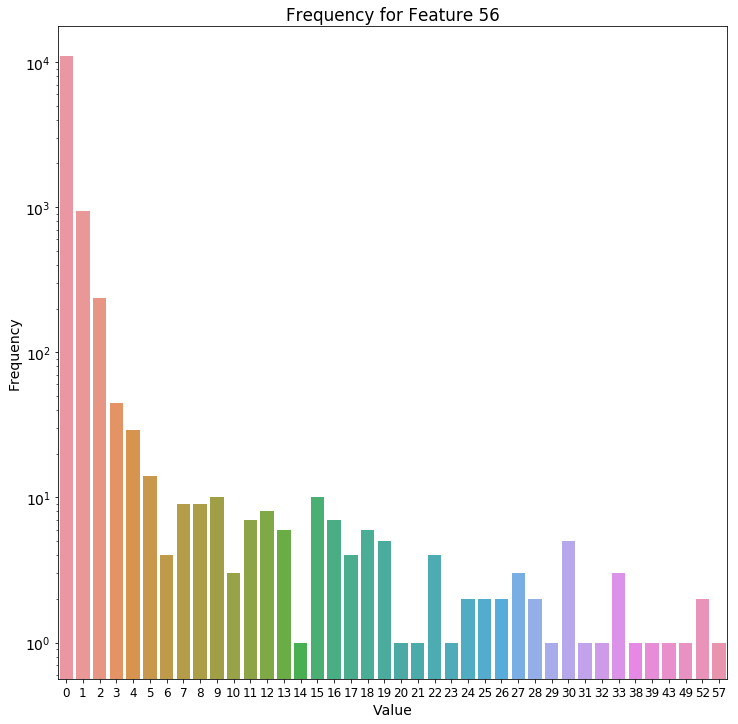

In [220]:
f, ax = plt.subplots(figsize=(12, 12))
ax.set(yscale="log")
ax.set_title('Frequency for Feature 56')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
sns.barplot(test_d['feat_56'].value_counts().sort_index().index, test_d['feat_56'].value_counts().sort_index().values)
plt.savefig('feature_plot.png')